In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/08_Aug.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,29.500000,81.000000,1,3,1,3331.0,3320.0,3301.0,3118.0,3254.0,3595.0,3303.750000,3142.0
1,29.416667,81.583333,1,3,1,3347.0,3306.0,3268.0,3078.0,3322.0,3490.0,3294.500000,3157.0
2,29.333333,82.166667,1,3,1,3364.0,3315.0,3259.0,3204.0,3401.0,3443.0,3295.666667,3273.0
3,29.250000,82.750000,1,3,1,3355.0,3345.0,3293.0,3132.0,3350.0,3338.0,3292.000000,3249.0
4,29.166667,83.333333,2,3,1,3142.0,3331.0,3320.0,3116.0,3281.0,3153.0,3283.583333,3219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,30.622452,79.727610,23,7,0,3792.0,3736.0,3703.0,3720.0,4040.0,3951.0,3758.333333,3835.0
8924,30.622452,79.727610,24,7,0,3799.0,3749.0,3687.0,3696.0,4015.0,3893.0,3769.416667,3820.0
8925,30.622452,79.727610,24,7,0,3802.0,3729.0,3698.0,3716.0,3961.0,3931.0,3781.833333,3847.0
8926,30.100000,79.727610,24,7,0,3809.0,3754.0,3710.0,3726.0,3990.0,3952.0,3797.083333,3893.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,-0.563259,0.854451,-0.292385
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,-0.282731,0.424478,-0.331120
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,0.043177,0.232014,-0.326234
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,-0.167220,-0.197959,-0.341588
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,-0.451873,-0.955531,-0.376833


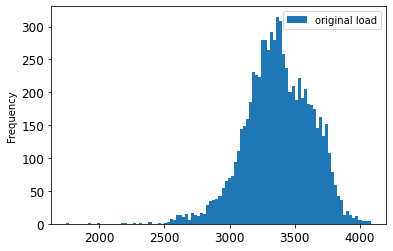

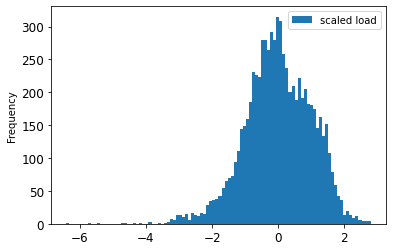

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

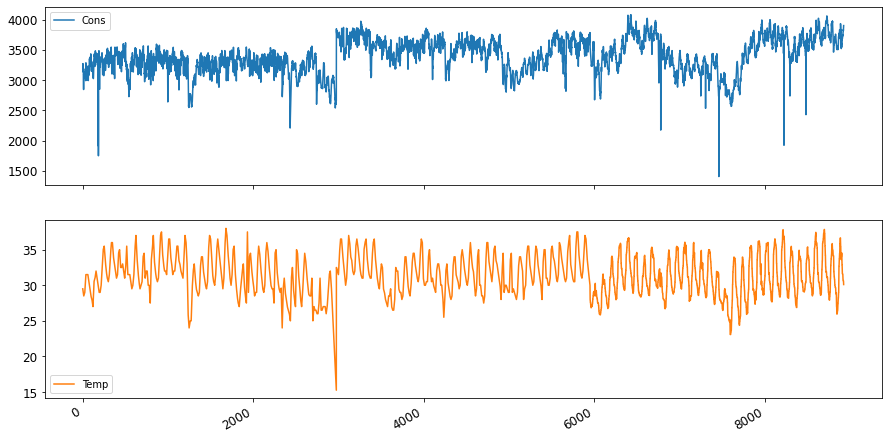

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,-0.563259,0.854451,-0.292385,-0.445643
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,-0.282731,0.424478,-0.331120,-0.765375
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,0.043177,0.232014,-0.326234,-0.891689
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,-0.167220,-0.197959,-0.341588,-0.524590
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,-0.451873,-0.955531,-0.376833,-0.303540
5,-0.864058,-0.853438,1.115936,-1.516457,-0.544263,0.592295,-0.855786,-0.106565,-0.271565,-1.244427,-0.567385,-1.229895,-0.429874,-0.264067
6,-0.836427,-0.883630,1.168857,-1.516457,-0.544263,0.592295,-0.397014,-0.039190,-0.235824,-1.276871,-0.171345,-1.115235,-0.483614,-0.374592
7,-0.990372,-0.913821,1.221777,-1.516457,-0.544263,0.592295,-0.491932,-0.074859,-0.116688,-1.110597,-0.146593,-1.217610,-0.561431,-0.496958
8,-1.085107,-0.944013,1.274697,-1.372011,-0.544263,0.592295,-0.610580,-0.919019,-0.172285,-1.183595,-0.328111,-1.004671,-0.642738,-0.540379
9,-1.602205,-0.974204,1.327618,-1.372011,-0.544263,0.592295,-0.867650,-0.859572,-0.108746,-1.264705,-0.175470,-0.918676,-0.775341,-0.694324


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.911426
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.911426,-0.852216
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,...,NaN,NaN,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483
5,-0.864058,-0.853438,1.115936,-1.516457,-0.544263,0.592295,-0.855786,-0.106565,-0.271565,-1.244427,...,NaN,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058
6,-0.836427,-0.883630,1.168857,-1.516457,-0.544263,0.592295,-0.397014,-0.039190,-0.235824,-1.276871,...,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427
7,-0.990372,-0.913821,1.221777,-1.516457,-0.544263,0.592295,-0.491932,-0.074859,-0.116688,-1.110597,...,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427,-0.990372
8,-1.085107,-0.944013,1.274697,-1.372011,-0.544263,0.592295,-0.610580,-0.919019,-0.172285,-1.183595,...,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427,-0.990372,-1.085107
9,-1.602205,-0.974204,1.327618,-1.372011,-0.544263,0.592295,-0.867650,-0.859572,-0.108746,-1.264705,...,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427,-0.990372,-1.085107,-1.602205


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7383,0.229347,-0.335669,1.086377,1.372460,0.490249,0.592295,-0.317915,-0.554406,-1.284219,-0.214336,...,-0.860111,-0.548273,-0.504853,-0.457485,-0.346961,-0.315382,-0.228541,-0.121964,0.166190,0.229347
7384,0.245136,-0.335669,1.086377,1.516906,0.490249,0.592295,-0.230906,-0.510810,-1.073746,-0.096727,...,-0.548273,-0.504853,-0.457485,-0.346961,-0.315382,-0.228541,-0.121964,0.166190,0.229347,0.245136
7385,0.055665,-0.335669,1.086377,1.516906,0.490249,0.592295,-0.124123,-0.463252,-1.069775,-0.068339,...,-0.504853,-0.457485,-0.346961,-0.315382,-0.228541,-0.121964,0.166190,0.229347,0.245136,0.055665
7386,0.071454,-0.440736,1.235389,1.516906,0.490249,0.592295,0.164587,-0.352283,-0.871215,-0.068339,...,-0.457485,-0.346961,-0.315382,-0.228541,-0.121964,0.166190,0.229347,0.245136,0.055665,0.071454
7387,0.201715,-0.545803,1.384401,1.516906,0.490249,0.592295,0.227866,-0.320577,-0.557491,-0.007506,...,-0.346961,-0.315382,-0.228541,-0.121964,0.166190,0.229347,0.245136,0.055665,0.071454,0.201715
7388,0.114875,-0.545803,1.384401,1.661352,0.490249,0.592295,0.243685,-0.233387,-0.513807,0.004660,...,-0.315382,-0.228541,-0.121964,0.166190,0.229347,0.245136,0.055665,0.071454,0.201715,0.114875
7389,0.118822,-0.545803,1.384401,1.661352,0.490249,0.592295,0.053849,-0.126381,-0.466153,0.012771,...,-0.228541,-0.121964,0.166190,0.229347,0.245136,0.055665,0.071454,0.201715,0.114875,0.118822
7390,0.205663,-0.607394,1.384401,1.661352,0.490249,0.592295,0.069668,0.162933,-0.354960,0.061437,...,-0.121964,0.166190,0.229347,0.245136,0.055665,0.071454,0.201715,0.114875,0.118822,0.205663
7391,0.233294,-0.607394,1.522521,1.661352,0.490249,0.592295,0.200181,0.226344,-0.323190,0.065492,...,0.166190,0.229347,0.245136,0.055665,0.071454,0.201715,0.114875,0.118822,0.205663,0.233294
7392,0.264872,-0.607394,1.522521,-1.660902,1.007505,0.592295,0.113173,0.242197,-0.235824,0.061437,...,0.229347,0.245136,0.055665,0.071454,0.201715,0.114875,0.118822,0.205663,0.233294,0.264872


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7283,-0.133806,-0.248718,1.115098,1.228014,-0.027007,0.592295,-0.389104,-0.950725,-1.141256,-0.015617,...,-1.096949,-0.943004,-0.812743,-0.560115,-0.568010,-0.386434,-0.228541,-0.248278,-0.193016,-0.133806
7284,-0.240383,-0.248718,1.115098,1.372460,-0.027007,0.592295,-0.230906,-0.819940,-0.867244,-0.023728,...,-0.943004,-0.812743,-0.560115,-0.568010,-0.386434,-0.228541,-0.248278,-0.193016,-0.133806,-0.240383
7285,-0.023281,-0.248718,1.115098,1.372460,-0.027007,0.592295,-0.250681,-0.566295,-1.026092,-0.104838,...,-0.812743,-0.560115,-0.568010,-0.386434,-0.228541,-0.248278,-0.193016,-0.133806,-0.240383,-0.023281
7286,-0.070649,-0.346538,1.184595,1.372460,-0.027007,0.592295,-0.195312,-0.574222,-1.109487,-0.039950,...,-0.560115,-0.568010,-0.386434,-0.228541,-0.248278,-0.193016,-0.133806,-0.240383,-0.023281,-0.070649
7287,-0.165384,-0.444359,1.254091,1.372460,-0.027007,0.592295,-0.135988,-0.391915,-0.954610,-0.181892,...,-0.568010,-0.386434,-0.228541,-0.248278,-0.193016,-0.133806,-0.240383,-0.023281,-0.070649,-0.165384
7288,-0.050912,-0.444359,1.254091,1.516906,-0.027007,0.592295,-0.242771,-0.233387,-0.823561,-0.023728,...,-0.386434,-0.228541,-0.248278,-0.193016,-0.133806,-0.240383,-0.023281,-0.070649,-0.165384,-0.050912
7289,-0.023281,-0.444359,1.254091,1.516906,-0.027007,0.592295,-0.025250,-0.253203,-0.569404,0.106047,...,-0.228541,-0.248278,-0.193016,-0.133806,-0.240383,-0.023281,-0.070649,-0.165384,-0.050912,-0.023281
7290,-0.023281,-0.464285,1.269546,1.516906,-0.027007,0.592295,-0.072709,-0.197718,-0.577347,0.057381,...,-0.248278,-0.193016,-0.133806,-0.240383,-0.023281,-0.070649,-0.165384,-0.050912,-0.023281,-0.023281
7291,0.035928,-0.484212,1.285000,1.516906,-0.027007,0.592295,-0.167627,-0.138270,-0.394672,0.077659,...,-0.193016,-0.133806,-0.240383,-0.023281,-0.070649,-0.165384,-0.050912,-0.023281,-0.023281,0.035928
7292,0.047770,-0.484212,1.285000,1.661352,-0.027007,0.592295,-0.052934,-0.245276,-0.235824,0.150657,...,-0.133806,-0.240383,-0.023281,-0.070649,-0.165384,-0.050912,-0.023281,-0.023281,0.035928,0.047770


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-0.690377
11,-0.706166
12,-0.690377
13,-0.658798
14,-0.587746
...,...
7288,0.114875
7289,0.118822
7290,0.205663
7291,0.233294


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-2.087724,-1.004396,1.380538,-1.372011,-0.544263,0.592295,-0.839966,-0.399841,-0.041235,-0.806436,-0.035206,-0.496893,-0.956798
11,-1.081160,-1.034588,1.433458,-1.372011,-0.544263,0.592295,-0.994208,-0.494958,-0.076976,-0.842935,-0.196098,-0.558318,-1.046131
12,-1.175896,-1.064779,1.486379,-1.227565,-0.544263,0.592295,-1.089127,-0.613853,-0.922841,-0.988932,-0.253853,-0.623838,-1.069511
13,-1.207474,-1.049684,1.463698,-1.227565,-0.544263,0.592295,-1.607223,-0.871461,-0.863273,-1.090319,-0.031081,-0.484608,-1.100917
14,-1.250894,-1.034588,1.441018,-1.227565,-0.544263,0.592295,-2.093679,-0.843719,-0.402614,-1.037598,-0.002203,-0.509178,-1.176641
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.050912,-0.444359,1.254091,1.516906,-0.027007,0.592295,-0.242771,-0.233387,-0.823561,-0.023728,0.105058,0.137829,-0.256443
7289,-0.023281,-0.444359,1.254091,1.516906,-0.027007,0.592295,-0.025250,-0.253203,-0.569404,0.106047,0.043177,0.137829,-0.208985
7290,-0.023281,-0.464285,1.269546,1.516906,-0.027007,0.592295,-0.072709,-0.197718,-0.577347,0.057381,0.080305,0.236109,-0.160829
7291,0.035928,-0.484212,1.285000,1.516906,-0.027007,0.592295,-0.167627,-0.138270,-0.394672,0.077659,0.138061,0.186969,-0.123491


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,3427.0,29.762451,88.39839,1.0,6.0,1.0,3403.0,3387.0,3342.0,3362.0,3418.0,3347.0,3417.666667
7394,3435.0,29.482451,90.03682,1.0,6.0,1.0,3425.0,3391.0,3415.0,3359.0,3390.0,3341.0,3419.333333
7395,3426.0,29.202452,91.67525,1.0,6.0,1.0,3432.0,3424.0,3431.0,3340.0,3369.0,3285.0,3418.916667
7396,3409.0,29.202452,91.67525,2.0,6.0,1.0,3440.0,3402.0,3435.0,3324.0,3381.0,3328.0,3416.750000
7397,3388.0,29.202452,91.67525,2.0,6.0,1.0,3427.0,3403.0,3387.0,3347.0,3327.0,3321.0,3416.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,3637.0,29.862452,79.07139,24.0,1.0,0.0,3564.0,3506.0,3431.0,3853.0,3835.0,3955.0,3558.916667
8350,3719.0,29.612452,79.07139,24.0,1.0,0.0,3582.0,3589.0,3508.0,3895.0,3890.0,3982.0,3576.500000
8351,3687.0,29.612452,79.50921,24.0,1.0,0.0,3605.0,3551.0,3489.0,3893.0,3897.0,4000.0,3593.000000
8352,3721.0,29.612452,79.50921,1.0,2.0,1.0,3611.0,3569.0,3496.0,3865.0,3884.0,3984.0,3611.750000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,0.322984,0.285065,0.097882
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,0.244531,0.266853,0.102493
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,0.185692,0.096877,0.101340
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,0.219314,0.227394,0.095347
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,0.068012,0.206147,0.095577
7398,0.006224,-0.488254,1.343075,-1.513750,0.810998,0.815789,0.140471,0.116117,0.026904,-0.060445,0.146465,0.154547,0.094425
7399,-0.132692,-0.568197,1.385800,-1.513750,0.810998,0.815789,0.116391,0.134861,0.115308,-0.100271,0.171682,0.020994,0.073680
7400,-0.242222,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.070906,0.156281,0.056372,-0.071065,0.076418,0.109018,0.048555
7401,-0.202150,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.014720,0.121473,0.059051,-0.156027,0.003569,0.045277,0.026658
7402,-0.359766,-0.664732,1.388913,-1.369419,0.810998,0.815789,0.009369,0.142893,0.117987,-0.116201,0.037191,0.011889,-0.013911


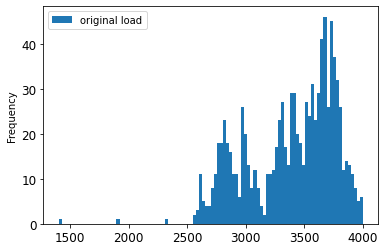

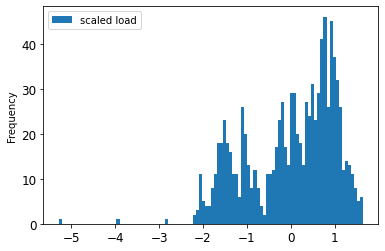

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,0.322984,0.285065,0.097882,-0.910088
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,0.244531,0.266853,0.102493,-0.960846
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,0.185692,0.096877,0.101340,-1.024961
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,0.219314,0.227394,0.095347,-1.105105
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,0.068012,0.206147,0.095577,-1.083733
7398,0.006224,-0.488254,1.343075,-1.513750,0.810998,0.815789,0.140471,0.116117,0.026904,-0.060445,0.146465,0.154547,0.094425,-0.966189
7399,-0.132692,-0.568197,1.385800,-1.513750,0.810998,0.815789,0.116391,0.134861,0.115308,-0.100271,0.171682,0.020994,0.073680,-0.966189
7400,-0.242222,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.070906,0.156281,0.056372,-0.071065,0.076418,0.109018,0.048555,-1.008932
7401,-0.202150,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.014720,0.121473,0.059051,-0.156027,0.003569,0.045277,0.026658,-1.067705
7402,-0.359766,-0.664732,1.388913,-1.369419,0.810998,0.815789,0.009369,0.142893,0.117987,-0.116201,0.037191,0.011889,-0.013911,-1.113119


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115754
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115754,0.137126
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115754,0.137126,0.113083
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,...,NaN,NaN,NaN,NaN,NaN,NaN,0.115754,0.137126,0.113083,0.067668
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,...,NaN,NaN,NaN,NaN,NaN,0.115754,0.137126,0.113083,0.067668,0.011567
7398,0.006224,-0.488254,1.343075,-1.513750,0.810998,0.815789,0.140471,0.116117,0.026904,-0.060445,...,NaN,NaN,NaN,NaN,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224
7399,-0.132692,-0.568197,1.385800,-1.513750,0.810998,0.815789,0.116391,0.134861,0.115308,-0.100271,...,NaN,NaN,NaN,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224,-0.132692
7400,-0.242222,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.070906,0.156281,0.056372,-0.071065,...,NaN,NaN,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224,-0.132692,-0.242222
7401,-0.202150,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.014720,0.121473,0.059051,-0.156027,...,NaN,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224,-0.132692,-0.242222,-0.202150
7402,-0.359766,-0.664732,1.388913,-1.369419,0.810998,0.815789,0.009369,0.142893,0.117987,-0.116201,...,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224,-0.132692,-0.242222,-0.202150,-0.359766


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8244,0.863764,0.445421,-0.278271,1.372873,1.259944,-1.225808,0.801333,0.970271,0.763607,0.775899,...,0.965280,0.962608,0.842392,0.938565,0.839721,0.796978,0.810335,0.909179,0.922536,0.863764
8245,0.946580,0.445421,-0.278271,1.372873,1.259944,-1.225808,0.814711,0.849779,0.768965,0.807760,...,0.962608,0.842392,0.938565,0.839721,0.796978,0.810335,0.909179,0.922536,0.863764,0.946580
8246,1.117553,0.305144,-0.106015,1.372873,1.259944,-1.225808,0.913706,0.946173,0.870764,0.988304,...,0.842392,0.938565,0.839721,0.796978,0.810335,0.909179,0.922536,0.863764,0.946580,1.117553
8247,1.061453,0.164867,0.066242,1.372873,1.259944,-1.225808,0.927084,0.847102,0.975242,1.102471,...,0.938565,0.839721,0.796978,0.810335,0.909179,0.922536,0.863764,0.946580,1.117553,1.061453
8248,1.050767,0.164867,0.066242,1.517204,1.259944,-1.225808,0.868222,0.804260,0.972563,1.110436,...,0.839721,0.796978,0.810335,0.909179,0.922536,0.863764,0.946580,1.117553,1.061453,1.050767
8249,1.021381,0.164867,0.066242,1.517204,1.259944,-1.225808,0.951164,0.817648,0.852012,1.171503,...,0.796978,0.810335,0.909179,0.922536,0.863764,0.946580,1.117553,1.061453,1.050767,1.021381
8250,1.114882,0.098499,0.119643,1.517204,1.259944,-1.225808,1.122399,0.916719,0.948453,1.086541,...,0.810335,0.909179,0.922536,0.863764,0.946580,1.117553,1.061453,1.050767,1.021381,1.114882
8251,1.077481,0.032131,0.173044,1.517204,1.259944,-1.225808,1.066213,0.930107,0.849333,1.176813,...,0.909179,0.922536,0.863764,0.946580,1.117553,1.061453,1.050767,1.021381,1.114882,1.077481
8252,1.077481,0.032131,0.173044,1.661535,1.259944,-1.225808,1.055511,0.871200,0.806470,1.229914,...,0.922536,0.863764,0.946580,1.117553,1.061453,1.050767,1.021381,1.114882,1.077481,1.077481
8253,1.253798,0.032131,0.173044,1.661535,1.259944,-1.225808,1.026079,0.954206,0.819865,1.283015,...,0.863764,0.946580,1.117553,1.061453,1.050767,1.021381,1.114882,1.077481,1.077481,1.253798


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,-1.062362
7404,-1.121134
7405,-1.051676
7406,-1.024961
7407,-0.979546
...,...
8249,0.676762
8250,0.895822
8251,0.810335
8252,0.901165


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7403,-0.319695,-0.761267,1.392026,-1.369419,0.810998,0.815789,-0.129760,0.118795,0.136739,-2.173872,0.003569,-0.112559,-0.052635
7404,-0.231536,-0.761267,1.392026,-1.225087,0.810998,0.815789,-0.239458,0.073276,0.158171,-0.171957,0.003569,-0.155053,-0.085597
7405,-0.284965,-0.761267,1.392026,-1.225087,0.810998,0.815789,-0.199325,0.017046,0.123345,-0.272849,-0.072082,-0.209688,-0.120172
7406,-0.341066,-0.835176,1.446038,-1.225087,0.810998,0.815789,-0.357182,0.011691,0.144776,-0.317985,-0.150535,-0.346276,-0.161432
7407,-0.386481,-0.909086,1.500050,-1.225087,0.810998,0.815789,-0.317049,-0.127544,0.120666,-0.336571,-0.212177,-0.237006,-0.204535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,1.021381,0.164867,0.066242,1.517204,1.259944,-1.225808,0.951164,0.817648,0.852012,1.171503,1.782770,1.851277,0.977015
8250,1.114882,0.098499,0.119643,1.517204,1.259944,-1.225808,1.122399,0.916719,0.948453,1.086541,1.788374,1.969654,0.992228
8251,1.077481,0.032131,0.173044,1.517204,1.259944,-1.225808,1.066213,0.930107,0.849333,1.176813,1.830402,2.051607,1.012742
8252,1.077481,0.032131,0.173044,1.661535,1.259944,-1.225808,1.055511,0.871200,0.806470,1.229914,1.715524,1.987866,1.036945


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(64, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=256,
          epochs=500,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/500
29/29 [==============================] - 1s 46ms/step - loss: 0.9165 - val_loss: 0.8879
Epoch 2/500
29/29 [==============================] - 1s 23ms/step - loss: 0.9129 - val_loss: 0.8835
Epoch 3/500
29/29 [==============================] - 1s 24ms/step - loss: 0.9088 - val_loss: 0.8792
Epoch 4/500
29/29 [==============================] - 1s 23ms/step - loss: 0.9069 - val_loss: 0.8750
Epoch 5/500
29/29 [==============================] - 1s 22ms/step - loss: 0.9029 - val_loss: 0.8709
Epoch 6/500
29/29 [==============================] - 1s 22ms/step - loss: 0.9006 - val_loss: 0.8668
Epoch 7/500
29/29 [==============================] - 1s 22ms/step - loss: 0.8974 - val_loss: 0.8627
Epoch 8/500
29/29 [==============================] - 1s 22ms/step - loss: 0.8947 - val_loss: 0.8588
Epoch 9/500
29/29 [==============================] - 1s 25ms/step - loss: 0.8916 - val_loss: 0.8549
Epoch 10/500
29/29 [==============================] - 1s 25ms/step - loss: 0.8900 - val_loss: 0.8509

29/29 [==============================] - 1s 22ms/step - loss: 0.7690 - val_loss: 0.6459
Epoch 156/500
29/29 [==============================] - 1s 22ms/step - loss: 0.7695 - val_loss: 0.6458
Epoch 157/500
29/29 [==============================] - 1s 22ms/step - loss: 0.7709 - val_loss: 0.6458
Epoch 158/500
29/29 [==============================] - 1s 22ms/step - loss: 0.7687 - val_loss: 0.6456
Epoch 159/500
29/29 [==============================] - 1s 22ms/step - loss: 0.7704 - val_loss: 0.6458
Epoch 160/500
29/29 [==============================] - 1s 22ms/step - loss: 0.7713 - val_loss: 0.6457
Epoch 161/500
29/29 [==============================] - 1s 22ms/step - loss: 0.7692 - val_loss: 0.6457
Epoch 162/500
29/29 [==============================] - 1s 22ms/step - loss: 0.7679 - val_loss: 0.6455
Epoch 163/500
29/29 [==============================] - 1s 22ms/step - loss: 0.7695 - val_loss: 0.6453
Epoch 164/500
29/29 [==============================] - 1s 22ms/step - loss: 0.7709 - val_loss: 0

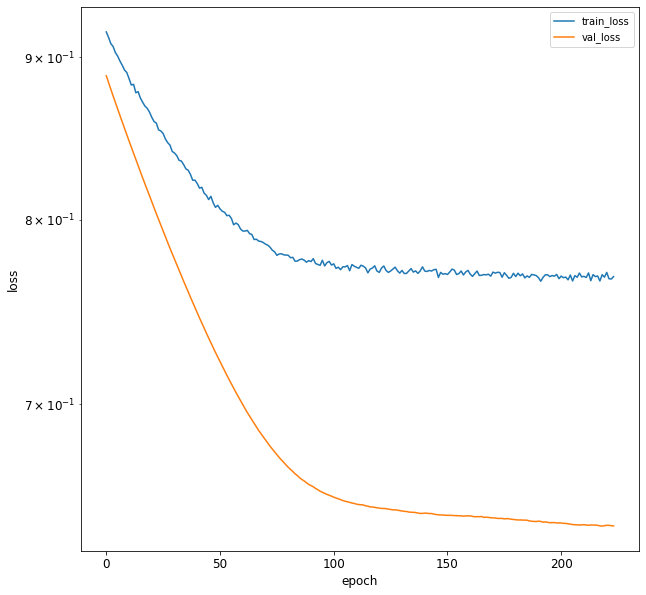

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,3627.0,29.077452,82.552515,1.0,2.0,1.0,3719.0,3582.0,3589.0,3879.0,3878.0,3963.0,3631.000000
8355,3585.0,28.542452,85.595820,1.0,2.0,1.0,3687.0,3605.0,3551.0,3878.0,3866.0,3961.0,3633.833333
8356,3596.0,28.542452,85.595820,2.0,2.0,1.0,3721.0,3611.0,3569.0,3849.0,3800.0,3924.0,3636.083333
8357,3538.0,28.542452,85.595820,2.0,2.0,1.0,3699.0,3637.0,3564.0,3846.0,3781.0,3843.0,3633.916667
8358,3541.0,28.412452,85.940575,2.0,2.0,1.0,3627.0,3719.0,3582.0,3817.0,3758.0,3816.0,3630.500000
8359,3509.0,28.282452,86.285330,2.0,2.0,1.0,3585.0,3687.0,3605.0,3808.0,3761.0,3813.0,3622.500000
8360,3459.0,28.282452,86.285330,3.0,2.0,1.0,3596.0,3721.0,3611.0,3781.0,3766.0,3805.0,3609.833333
8361,3469.0,28.282452,86.285330,3.0,2.0,1.0,3538.0,3699.0,3637.0,3774.0,3724.0,3714.0,3595.833333
8362,3483.0,27.852452,86.661775,3.0,2.0,1.0,3541.0,3627.0,3719.0,3746.0,3721.0,3747.0,3576.166667
8363,3436.0,27.422451,87.038220,3.0,2.0,1.0,3509.0,3585.0,3687.0,3734.0,3689.0,3734.0,3555.250000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


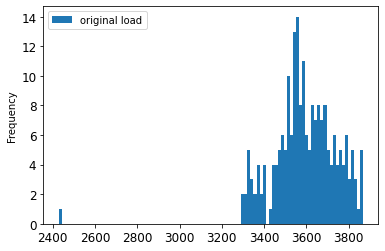

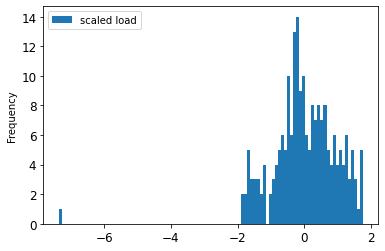

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,0.230802,-0.816050,0.702767,-1.498364,-1.004934,0.0,0.790719,-0.081883,-0.033282,2.029484,1.363377,1.497244,0.298366,0.807419
8355,-0.035329,-1.043549,0.971002,-1.498364,-1.004934,0.0,0.588745,0.063409,-0.273319,2.023599,1.309269,1.485657,0.320976,0.718709
8356,0.034372,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.803343,0.101311,-0.159617,1.852959,1.011680,1.271292,0.338931,0.585643
8357,-0.333142,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.664485,0.265555,-0.191201,1.835306,0.926011,0.802008,0.321641,0.439905
8358,-0.314132,-1.098828,1.001389,-1.357685,-1.004934,0.0,0.210043,0.783554,-0.077499,1.664665,0.822305,0.645580,0.294376,0.553961
8359,-0.516899,-1.154108,1.031775,-1.357685,-1.004934,0.0,-0.055049,0.581408,0.067786,1.611708,0.835832,0.628199,0.230536,0.408223
8360,-0.833721,-1.154108,1.031775,-1.217006,-1.004934,0.0,0.014380,0.796188,0.105686,1.452835,0.858377,0.581850,0.129456,0.142092
8361,-0.770357,-1.154108,1.031775,-1.217006,-1.004934,0.0,-0.351699,0.657213,0.269922,1.411646,0.669002,0.054630,0.017735,0.097737
8362,-0.681646,-1.336958,1.064955,-1.217006,-1.004934,0.0,-0.332764,0.202384,0.787896,1.246889,0.655475,0.245819,-0.139205,0.211793
8363,-0.979459,-1.519807,1.098135,-1.217006,-1.004934,0.0,-0.534738,-0.062932,0.585760,1.176279,0.511189,0.170502,-0.306120,0.281494


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,0.230802,-0.816050,0.702767,-1.498364,-1.004934,0.0,0.790719,-0.081883,-0.033282,2.029484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230802
8355,-0.035329,-1.043549,0.971002,-1.498364,-1.004934,0.0,0.588745,0.063409,-0.273319,2.023599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230802,-0.035329
8356,0.034372,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.803343,0.101311,-0.159617,1.852959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230802,-0.035329,0.034372
8357,-0.333142,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.664485,0.265555,-0.191201,1.835306,...,NaN,NaN,NaN,NaN,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142
8358,-0.314132,-1.098828,1.001389,-1.357685,-1.004934,0.0,0.210043,0.783554,-0.077499,1.664665,...,NaN,NaN,NaN,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132
8359,-0.516899,-1.154108,1.031775,-1.357685,-1.004934,0.0,-0.055049,0.581408,0.067786,1.611708,...,NaN,NaN,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899
8360,-0.833721,-1.154108,1.031775,-1.217006,-1.004934,0.0,0.014380,0.796188,0.105686,1.452835,...,NaN,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899,-0.833721
8361,-0.770357,-1.154108,1.031775,-1.217006,-1.004934,0.0,-0.351699,0.657213,0.269922,1.411646,...,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899,-0.833721,-0.770357
8362,-0.681646,-1.336958,1.064955,-1.217006,-1.004934,0.0,-0.332764,0.202384,0.787896,1.246889,...,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899,-0.833721,-0.770357,-0.681646
8363,-0.979459,-1.519807,1.098135,-1.217006,-1.004934,0.0,-0.534738,-0.062932,0.585760,1.176279,...,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899,-0.833721,-0.770357,-0.681646,-0.979459


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8461,0.097737,-0.801167,1.015461,-1.076327,0.516823,0.0,0.418329,0.714066,1.533273,-0.889065,...,1.016522,0.744054,0.807419,0.718709,0.585643,0.439905,0.553961,0.408223,0.142092,0.097737
8462,0.211793,-0.813925,1.001861,-1.076327,0.516823,0.0,0.531940,0.777237,1.362721,-0.977327,...,0.744054,0.807419,0.718709,0.585643,0.439905,0.553961,0.408223,0.142092,0.097737,0.211793
8463,0.281494,-0.826682,0.988262,-1.076327,0.516823,0.0,0.386770,0.688798,1.223752,-1.112663,...,0.807419,0.718709,0.585643,0.439905,0.553961,0.408223,0.142092,0.097737,0.211793,0.281494
8464,0.015363,-0.826682,0.988262,-0.935648,0.516823,0.0,0.121679,0.556140,0.990032,-1.189157,...,0.718709,0.585643,0.439905,0.553961,0.408223,0.142092,0.097737,0.211793,0.281494,0.015363
8465,-0.130375,-0.826682,0.988262,-0.935648,0.516823,0.0,0.077497,0.410847,0.718412,-1.324493,...,0.585643,0.439905,0.553961,0.408223,0.142092,0.097737,0.211793,0.281494,0.015363,-0.130375


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,0.015363
8365,-0.130375
8366,-0.028992
8367,-0.238095
8368,-0.092357
...,...
8461,-0.225422
8462,-0.187403
8463,-0.364824
8464,-0.339478


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8364,-1.270936,-1.519807,1.098135,-1.076327,-1.004934,0.0,-0.850323,0.006555,0.800530,1.105669,0.551769,-0.003307,-0.526235
8365,-1.315291,-1.519807,1.098135,-1.076327,-1.004934,0.0,-0.787206,-0.359834,0.661561,0.893839,0.497662,0.019868,-0.736376
8366,-1.410338,-1.570834,1.136326,-1.076327,-1.004934,0.0,-0.698842,-0.340883,0.206755,0.782040,0.344359,-0.177116,-0.908611
8367,-1.556076,-1.621862,1.174517,-1.076327,-1.004934,0.0,-0.995493,-0.543029,-0.058549,0.699661,0.416502,-0.298782,-1.068211
8368,-1.638450,-1.621862,1.174517,-0.935648,-1.004934,0.0,-1.285831,-0.858882,0.010935,0.776155,0.366903,-0.368306,-1.243771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,0.097737,-0.801167,1.015461,-1.076327,0.516823,0.0,0.418329,0.714066,1.533273,-0.889065,0.497662,-0.107592,0.831697
8462,0.211793,-0.813925,1.001861,-1.076327,0.516823,0.0,0.531940,0.777237,1.362721,-0.977327,0.411993,-0.304576,0.708006
8463,0.281494,-0.826682,0.988262,-1.076327,0.516823,0.0,0.386770,0.688798,1.223752,-1.112663,0.348868,-0.211877,0.606261
8464,0.015363,-0.826682,0.988262,-0.935648,0.516823,0.0,0.121679,0.556140,0.990032,-1.189157,0.407484,-0.275607,0.501191


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.9600551128387451s


In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3590.575472
dtype: float64
Cons    158.190655
dtype: float64


In [46]:
load_mean=3590.575472
load_std=158.190655
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


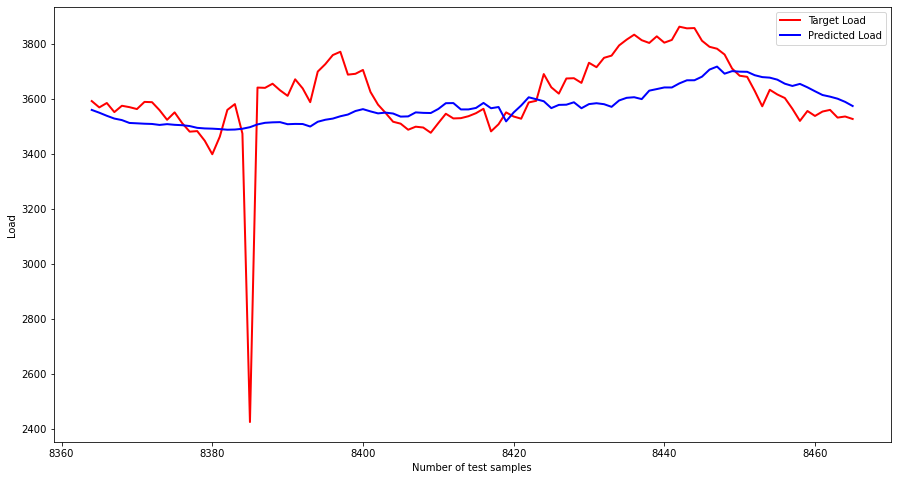

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

2.7671108191399325


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    0.793807
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  359201.470472
8365  356895.669202
8366  358500.214564
8367  355191.768506
8368  357498.007502
...             ...
8461  355389.888074
8462  355991.647159
8463  353184.425870
8464  353585.814746
8465  352683.851498

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

          y_t+100
8364  1037.772662
8365   370.407694
8366  2164.831054
8367   553.348883
8368  2715.684581
...           ...
8461  3616.715405
8462  2320.405435
8463  4730.463215
8464  2832.245643
8465  2227.274194

[102 rows x 1 columns]
y_t+100    22571.082351
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    150.236754
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3560.7913]
[3550.7053]
[3539.4614]
[3529.3877]
[3523.8533]
[3513.4404]
[3512.073]
[3510.6038]
[3509.7224]
[3506.1924]
[3509.1045]
[3506.5925]
[3505.2507]
[3502.0974]
[3495.6255]
[3493.4731]
[3492.6226]
[3491.0474]
[3488.8071]
[3489.4153]
[3492.2844]
[3498.05]
[3508.135]
[3513.919]
[3515.6406]
[3516.3467]
[3508.8157]
[3509.9187]
[3509.5286]
[3500.3926]
[3517.773]
[3525.0073]
[3529.2886]
[3537.7402]
[3543.9924]
[3556.835]
[3563.6638]
[3555.4617]
[3548.2227]
[3551.0366]
[3547.7207]
[3536.4927]
[3537.255]
[3551.8528]
[3550.1218]
[3549.5347]
[3564.3]
[3585.2676]
[3585.7048]
[3562.6208]
[3562.6433]
[3567.9805]
[3586.2563]
[3566.949]
[3571.3792]
[3519.1738]
[3551.481]
[3576.9055]
[3606.7822]
[3599.7227]
[3592.3992]
[3567.3528]
[3579.1316]
[3579.8237]
[3588.612]
[3566.9465]
[3581.9866]
[3585.1877]
[3581.6511]
[3572.]
[3595.237]
[3604.849]
[3607.0066]
[3600.1882]
[3630.9175]
[3636.6514]
[3642.5764]
[3642.4766]
[3657.3625]
[3668.6414]
[3668.7737]
[3681.7507]
[3707.58]
[3718.4863]
[3692.657]
[37